##**Zomato Data Analysis Using Python**

## Step 1: Importing necessary python libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Create the dataframe

In [14]:
dataframe = pd.read_csv("/content/Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [15]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


##Step 3: Convert the data type of column "rate" to float and remove denominator

In [16]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handlerate)
dataframe['rate']

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8
...,...
143,3.3
144,3.3
145,4.0
146,3.0


Summary of the Dataframe

In [19]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Conclusion: There is no NULL value in dataframe

**Types** **of restaurants**

In [20]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


**Q1. What type of restaurant do the majority of the customer order from?**

Text(0.5, 0, 'Type of restaurant')

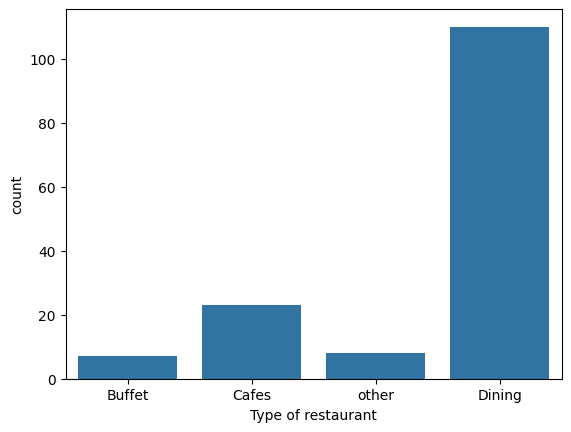

In [22]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

##**Conclusion:** Majority of customers fall into Dining Category

In [23]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


**Q2. How many votes has each type of restaurant received from customers?**

Text(0.5, 1.0, 'Votes by type of restaurant')

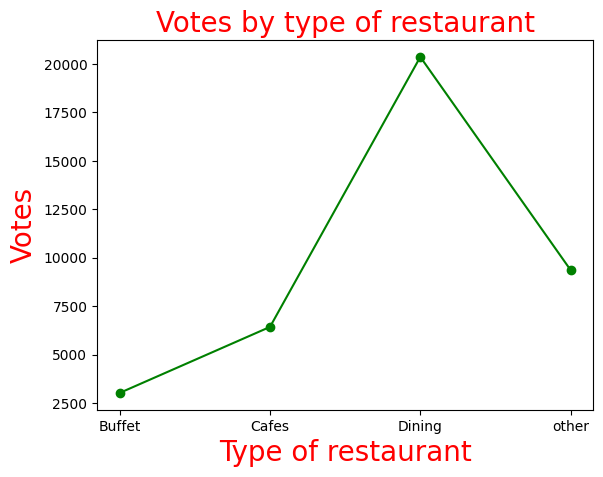

In [24]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)
plt.title("Votes by type of restaurant", c="red", size=20)

## **Conclusion:** Dining restaurants have received maximum votes

In [25]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


**Q3. What are the ratings that the majority of restaurants have received?**

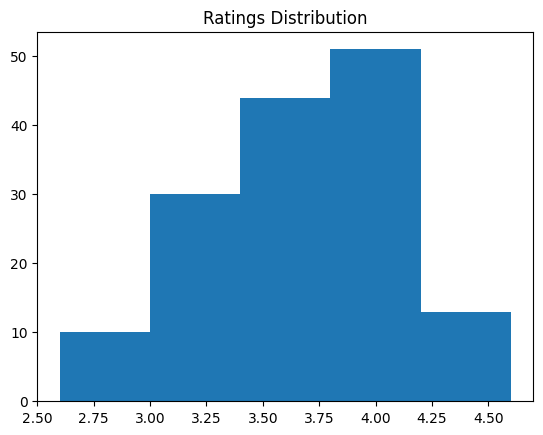

In [26]:
plt.hist(dataframe['rate'],bins = 5)
plt.title("Ratings Distribution")
plt.show()

##**Conclusion:** The majority of restaurants received majority ratings between 3.4 to 4

**Q4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?**

Text(0.5, 0, 'Average order spending by Couples')

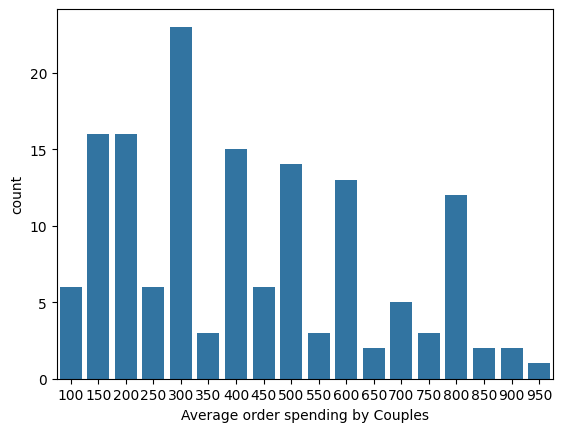

In [27]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel("Average order spending by Couples")

##**Conclusion:** The majority of couples prefer restaurants with an approximate cost of 300 rupees

**Q5. Which mode (Online/offline) has received the maximum rating?**

<Axes: xlabel='online_order', ylabel='rate'>

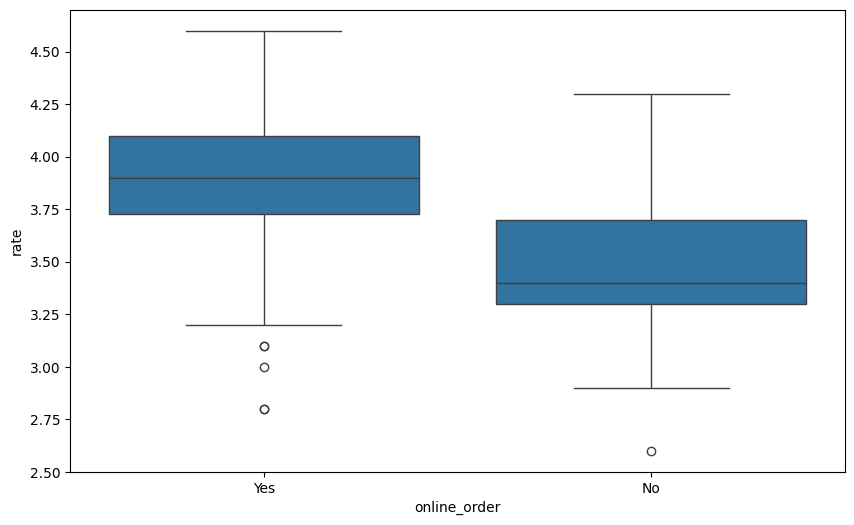

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='rate', data=dataframe)

##**Conclusion:** Offline order received lower ratings in comparison to online order

**Q6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?**

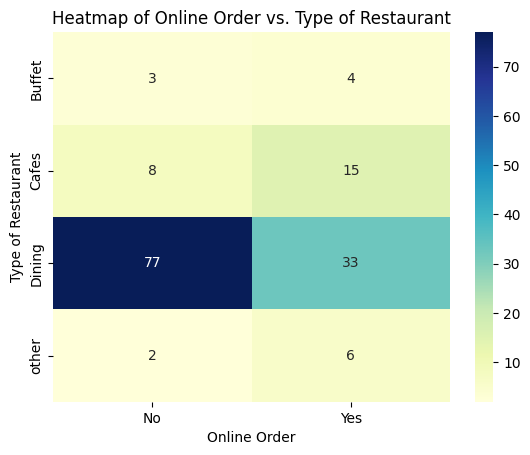

In [32]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', values='rate', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Online Order")
plt.ylabel("Type of Restaurant")
plt.title("Heatmap of Online Order vs. Type of Restaurant")
plt.show()

##**Conclusion:** Dining restaurants primarily accept offline ordrs, whereas cafes primarily receive online orders. This suggests that clients prefer to order in person at restaurants, but prefer online ordering in cafes.